In [2]:
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from MyDatasetLoader import MyDatasetLoader

In [3]:
dataset=MyDatasetLoader(root='./cora')
train_y= dataset[0].y[dataset[0].train_mask]
test_y = dataset[0].y[dataset[0].test_mask]
train_x=dataset[0].x[dataset[0].train_mask]
test_x=dataset[0].x[dataset[0].test_mask]
dataset[0].labels_count
np.random.rand(10, 12)

Processing...
Done!


array([[0.62487402, 0.98412906, 0.85196263, 0.81898171, 0.37436625,
        0.5517299 , 0.95955383, 0.425217  , 0.60335535, 0.85688299,
        0.53093565, 0.36656393],
       [0.90917206, 0.91981354, 0.15945323, 0.45834457, 0.41287441,
        0.83179181, 0.05144681, 0.59522692, 0.68588068, 0.11029795,
        0.55846322, 0.35844969],
       [0.09495115, 0.55702874, 0.93723223, 0.17699803, 0.14871854,
        0.30233705, 0.62452439, 0.53500491, 0.64416663, 0.74801682,
        0.75757109, 0.52237099],
       [0.49065847, 0.74523734, 0.97438001, 0.66003055, 0.60750878,
        0.83738226, 0.14803312, 0.30403081, 0.01624997, 0.21414619,
        0.49113592, 0.63732202],
       [0.01204127, 0.23985178, 0.03382279, 0.12911636, 0.59944625,
        0.08707673, 0.29083652, 0.37777519, 0.63061938, 0.69707423,
        0.5121914 , 0.80159717],
       [0.07695583, 0.66769134, 0.96511566, 0.69562695, 0.64350241,
        0.84174078, 0.74620511, 0.46484967, 0.61854434, 0.66620028,
        0.63245682,

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
matrix=np.zeros((len(dataset[0].x[0]),7))
for element,label in zip(dataset[0].x,dataset[0].y):
    for feature,index in zip(element,range(0,len(element))):
        matrix[index][label]=matrix[index][label]+feature


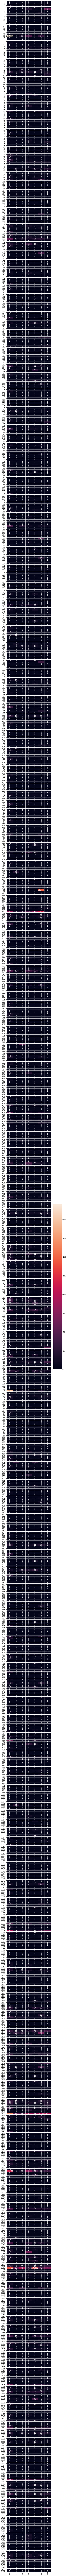

In [41]:
matrice=matrix
#matrix[matrix==0.0]=np.nan
plt.figure(figsize = (6,0.2*len(matrice)))
sns.heatmap(matrice, annot=True, linewidths=.5)
plt.show()


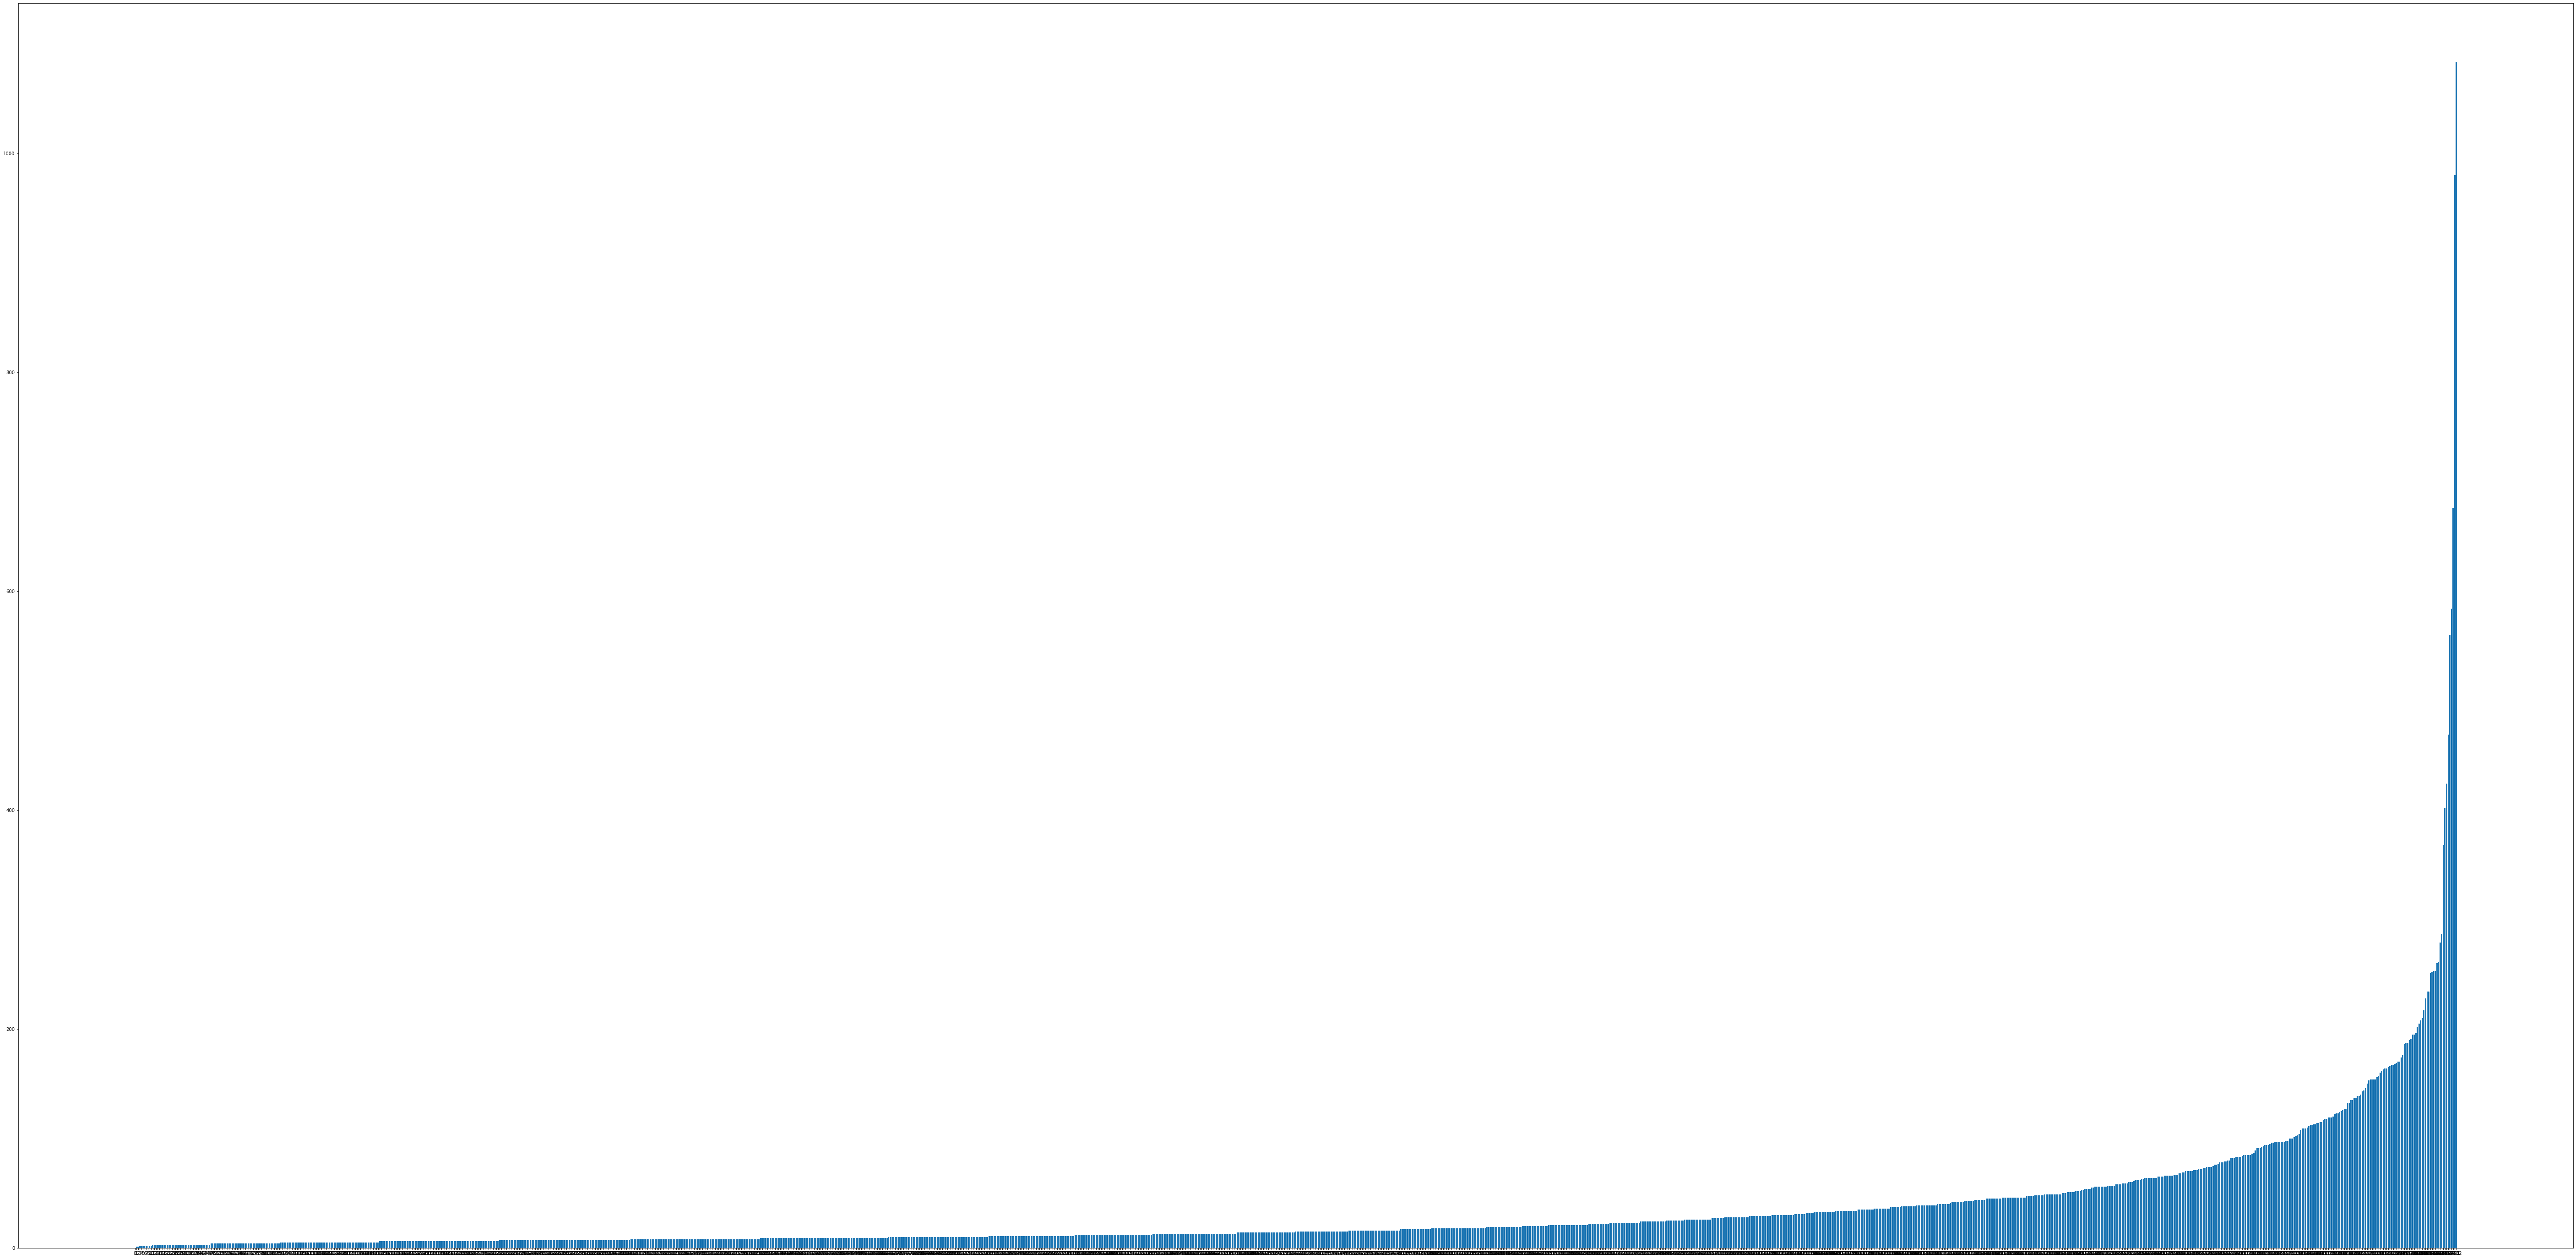

max:  1083.0
min:  0.0
avg:  34.34473133286811


In [69]:


word_count=dataset[0].word_count
plt.figure(figsize = (100, 50))
plt.bar(range(len(word_count)), sorted(list(word_count.values())), align='center')
plt.xticks(range(len(word_count)), list(word_count.keys()))
plt.show()
def avg(lst):
    return sum(lst) / len(lst)
print("max: ",max(list(word_count.values())))
print("min: ",min(list(word_count.values())))
print("avg: ",avg(list(word_count.values())))


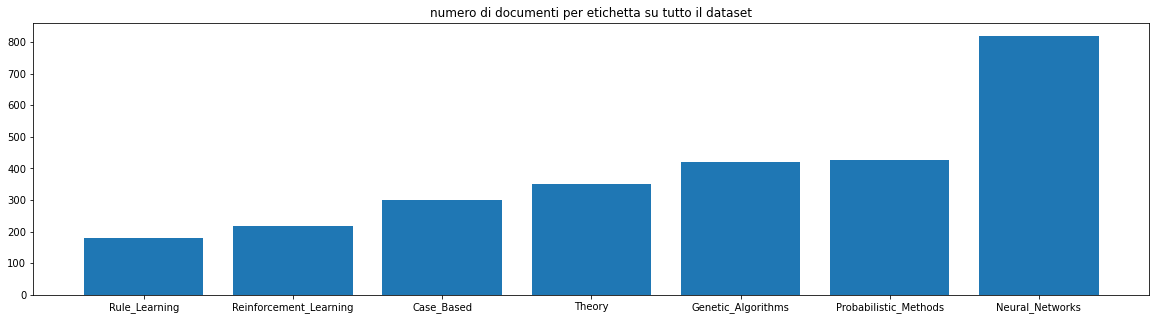

In [70]:
labels_count=dataset[0].labels_count
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta su tutto il dataset')
plt.show()

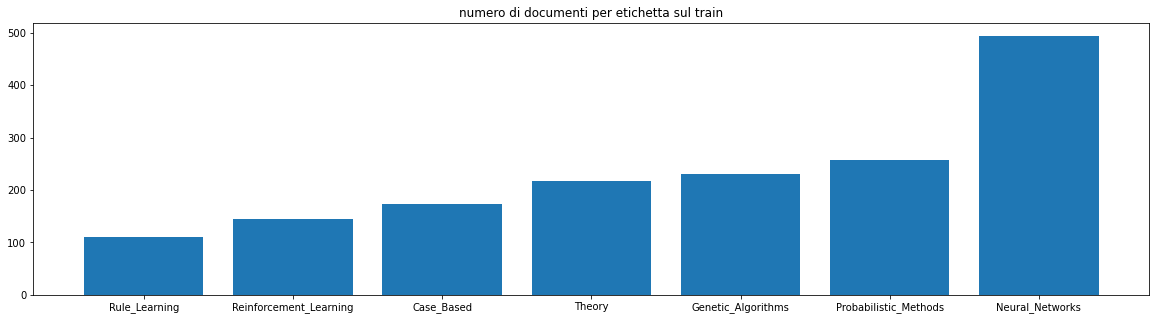

In [71]:

label_map=inv_map = {dataset.data.label_map[k] : k for k in dataset.data.label_map}
labels_count=dataset[0].labels_count
for x in labels_count.keys():
    labels_count[x]=0
for label in train_y:
    labels_count[label_map[int(label)]]+=1
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta sul train')
plt.show()

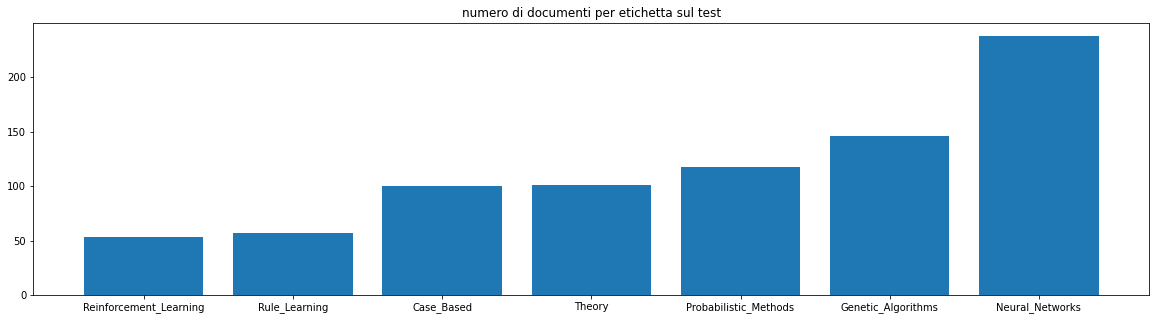

In [72]:
labels_count=dataset[0].labels_count
for x in labels_count.keys():
    labels_count[x]=0
for label in test_y:
    labels_count[label_map[int(label)]]+=1
Z = [x for _,x in sorted(zip(list(labels_count.values()),list(labels_count.keys())))]
plt.figure(figsize = (20, 5))
plt.bar(range(len(labels_count)), sorted(list(labels_count.values())), align='center')
plt.xticks(range(len(labels_count)),Z)
plt.title('numero di documenti per etichetta sul test')
plt.show()

In [1]:


color_list = ["red", "orange", "green", "blue", "purple", "brown","fuchsia"]
embs=[]
colors = []
colors +=  [color_list[y] for y in train_y]
#embs = torch.cat(embs, dim=0)
#np.shape( embs.detach().numpy())
#pca = PCA(n_components=500)
#train_x = pca.fit_transform(train_x)

xs, ys = zip(*TSNE(learning_rate='auto').fit_transform(train_x))
print(len(xs),len(ys),len(colors))
plt.figure(figsize = (10, 10))
plt.title("TSNE del traning set")
plt.scatter(xs, ys, color=colors)

NameError: name 'train_y' is not defined

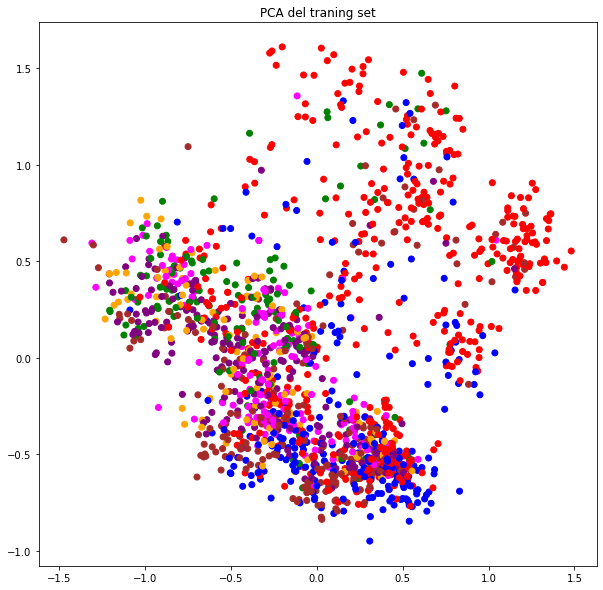

In [74]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_x)
xs,ys=zip(*principalComponents)
plt.figure(figsize = (10, 10))
plt.title("PCA del traning set")
plt.scatter(xs, ys, color=colors)

C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


813 813 813


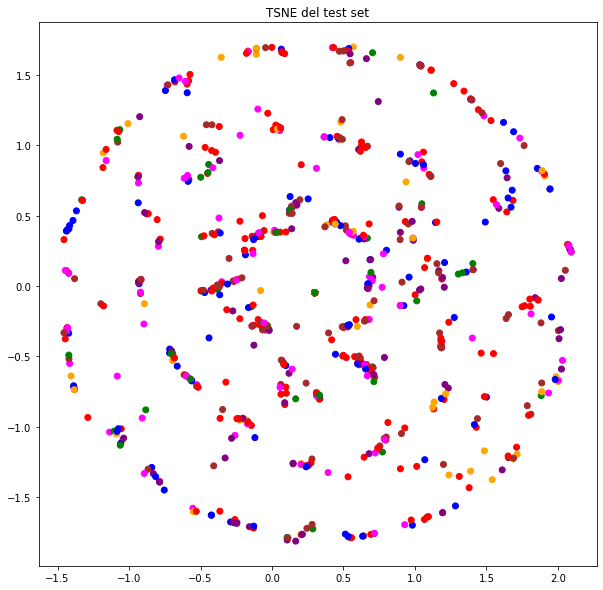

In [75]:
pca = PCA(n_components=500)
#test_x = pca.fit_transform(test_x)
colors=[]
colors +=  [color_list[y] for y in test_y]

xs, ys = zip(*TSNE().fit_transform(test_x))
print(len(xs),len(ys),len(colors))
plt.figure(figsize = (10, 10))
plt.title("TSNE del test set")
plt.scatter(xs, ys, color=colors)

813


C:\Users\damia\anaconda3\envs\tesiNew\lib\site-packages\sklearn\decomposition\_pca.py:595: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


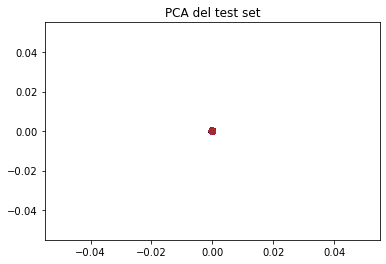

In [77]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(test_x)
print(len(principalComponents))
xs,ys=zip(*principalComponents)
#plt.figure(figsize = (40, 40))
plt.title("PCA del test set")
plt.scatter(xs, ys, color=colors)